# HW 2 AAP - Excel with Python

Notebook for assignment 2 using Python in Excel to do various things...

## Preliminaries

In [20]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import commonly used libraries and magic command for inline plotting

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [22]:
%matplotlib inline

Now we need to import our whatif.py module that is provided with the assignment...

In [23]:
from whatif import Model
from whatif import get_sim_results_df

## Work

This is where work gets done.

### Analysis 1 - Basic Break Even Analysis

#### 1a - Base Model

Here we are going to setup our base model following along with the HW and the hw2 getting started video

In [24]:
class SingleProductSPF(Model):
    ### HW2 Base Model ###
    def __init__(
            self,
            fixed_cost = 5000,
            var_cost = 100,
            selling_price = 115,
            spf_constant = 4900,
            spf_linear = -35,
            spf_quadratic = 0.06
        ):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic

    def demand(self):
        ### compute demand function ###
        return (self.spf_quadratic * pow(self.selling_price, 2)) + (self.spf_linear * self.selling_price) + self.spf_constant
    
    def order_cost(self):
        ### compute total order costs ###
        order_c = (self.demand() * self.var_cost) + self.fixed_cost
        return order_c

    def sales_revenue(self):
        ### compute sales revenue ###
        sales_r = self.demand() * self.selling_price
        return sales_r

    def profit(self):
        ### compute profit function ###
        p = self.sales_revenue() - self.order_cost()
        return p

In [25]:
# Create our model
model_1 = SingleProductSPF()

# Test our demand function
print(model_1.demand())

# check our profit
print(model_1.profit())

1668.5
20027.5


#### 1b - 1 Way Data Table

Base model is finished... Now we are going to create a one-way data table using our `data_table` function

In [26]:
# set our price range based on the instructions
price_range = {'selling_price' : np.arange(80, 150, 10)}

# list our output
outputs = ['profit', 'demand']

# create our one way data table using the built in function the the `whatif.py` module
m1_dt1_p_df = model_1.data_table(price_range, outputs)

# check our dataframe
m1_dt1_p_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


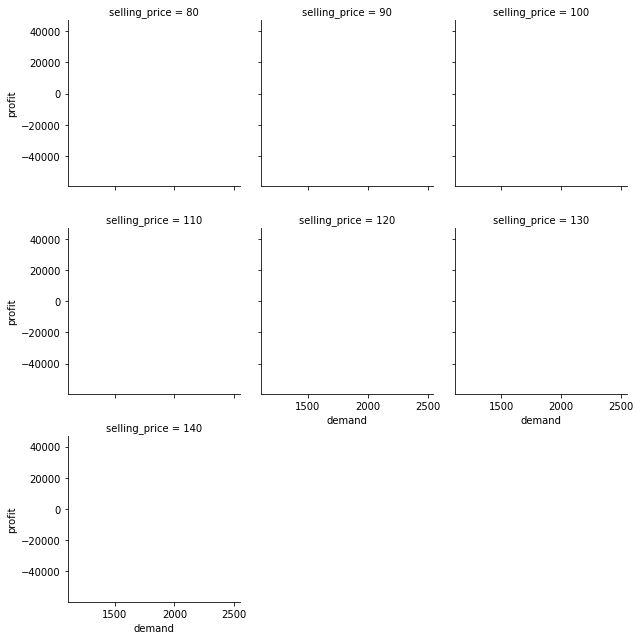

In [27]:
# Now lets plot our one way data table for profit
profit_dt = sns.FacetGrid(m1_dt1_p_df, col="selling_price", sharey=True, col_wrap=3)
profit_dt = profit_dt.map(plt.plot, "demand", "profit")

I feel like I did the plotting the exact same way and it won't work...

Now we want to create a one way data table for demand...

In [28]:
# set our price range based on the instructions
price_range = {'selling_price' : np.arange(80, 150, 10)}

# list our output for profit
output_d = ['demand']

# create our one way data table using the built in function the the `whatif.py` module
m1_dt_d_df = model_1.data_table(price_range, output_d)

# check our dataframe
m1_dt_d_df

,selling_price,demand
0,80,2484.0
1,90,2236.0
2,100,2000.0
3,110,1776.0
4,120,1564.0
5,130,1364.0
6,140,1176.0


#### 1c - Break Even

In [29]:
break_even = model_1.goal_seek(obj_fn='profit', target='demand', by_changing="selling_price", a=0, b=0, N=1000)

TypeError: unsupported operand type(s) for -: 'float' and 'str'

#### 1d - 2 Way Data Table

In [ ]:
# set our price range based on the instructions
inputs = {
    'selling_price' : np.arange(80, 150, 10),
    'variable_price' : np.arange(85, 115, 5)
}

# list our outputs
outputs = ['profit', 'demand']

# create our one way data table using the built in function the the `whatif.py` module
m1_dt2_df = model_1.data_table(inputs, outputs)

# check our dataframe
m1_dt2_df

,selling_price,variable_price,profit,demand
0,80,85,-54680.0,2484.0
1,80,90,-54680.0,2484.0
2,80,95,-54680.0,2484.0
3,80,100,-54680.0,2484.0
4,80,105,-54680.0,2484.0
5,80,110,-54680.0,2484.0
6,90,85,-27360.0,2236.0
7,90,90,-27360.0,2236.0
8,90,95,-27360.0,2236.0
9,90,100,-27360.0,2236.0


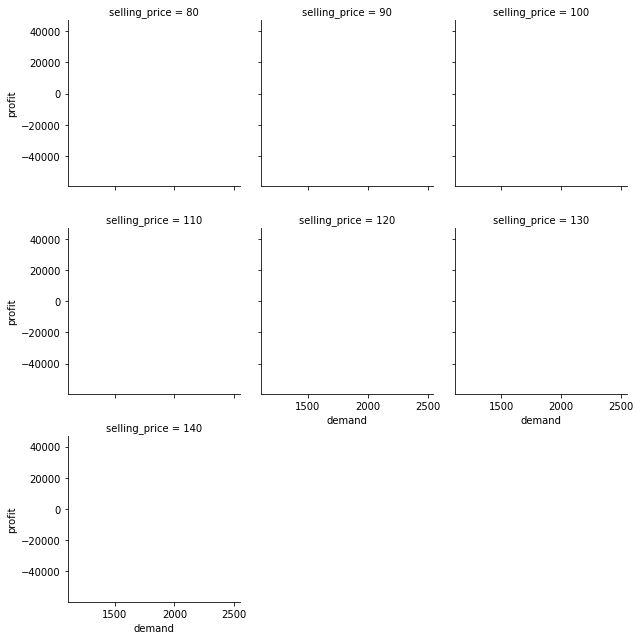

In [ ]:
# Now lets plot our one way data table for profit
m1_dt2_pl = sns.FacetGrid(m1_dt2_df, col="selling_price", sharey=True, col_wrap=3)
m1_dt2_pl = m1_dt2_pl.map(plt.plot, "demand", "profit")

#### 1e - Digging Deeper

I really dont understand how to make the goal seek work for this.

I feel like the bookstore model didn't correlate well with this or maybe I just misunderstood the youtube videos.

#### 1f - Simulation

In [ ]:
# Create our model object
model_2 = SingleProductSPF()

num_reps = 100

# input values
random_inputs = {
    'demand' : np.random.normal(
                        193,
                        40,
                        num_reps
                ),
    'order_cost' : np.random.uniform(7,8,num_reps)
}

# scenario inputs
scenario_inputs = {'order_quantity' : np.arange(70, 321, 50)}

from sklearn.model_selection._search import ParameterGrid

list(ParameterGrid(scenario_inputs))

[{'order_quantity': 70},
 {'order_quantity': 120},
 {'order_quantity': 170},
 {'order_quantity': 220},
 {'order_quantity': 270},
 {'order_quantity': 320}]

In [ ]:
sim_outputs = ["profit"]

model_2.simulate(
    random_inputs=random_inputs,
    outputs=sim_outputs, 
    scenario_inputs=scenario_inputs, 
    keep_random_inputs=False
)

TypeError: 'numpy.ndarray' object is not callable

And again, I really don't undertstand how to use this with the model. Like I feel as if I'm doing the same thing but I never get the same results.